In [1]:
# dataFrame based on demoGraphics
import warnings
warnings.filterwarnings('ignore')

12

12

In [2]:
import pandas as pd
import random

In [3]:
# Sample feedback for demonstration
feedback_samples = [
    "The network connection is really slow.",
    "I faced an outage for three hours yesterday.",
    "The customer support was really helpful.",
    "Billing issues! Charged me extra this month.",
    "Altice has the best internet service.",
    "The installation process was smooth.",
    "I'm not satisfied with the customer service response.",
    "Why does my connection drop so frequently?",
    "There are hidden charges in my bill!",
    "I'd recommend Altice to everyone."
]

channels = ["customer_support", "social_media", "audio_transcripts"]

# Generate dummy data
data = {
    "complaints": [random.choice(feedback_samples) for _ in range(100)],
    "Channel": [random.choice(channels) for _ in range(100)]
}

df = pd.DataFrame(data)

df.head()


complaints            Channel
0             The network connection is really slow.       social_media
1       I faced an outage for three hours yesterday.  audio_transcripts
2         Why does my connection drop so frequently?  audio_transcripts
3             The network connection is really slow.   customer_support
4  I'm not satisfied with the customer service re...       social_media

# Text Cleaning or Text Pre-processiong

In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from langdetect import detect

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # 2. Convert to lowercase
    text = text.lower()
    
    # 7. Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    # 9. Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # 8. Remove special characters (excluding space)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 1. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 11. Remove extra whitespaces
    text = " ".join(tokens)
    
    # 12. Sentence segmentation
    sentences = sent_tokenize(text)
    
    # 13. Language detection (just an example, you might need a more robust solution)
    lang = detect(text)
    
    # 14. Code switching detection (not implementing as it's quite involved and requires additional tools)
    # 15. N-gram generation (example for bigrams; you can adjust for other n-grams)
    bigrams = list(nltk.bigrams(tokens))
    
    # 16. Noise reduction (not implementing as it's specific to the dataset and might need manual rules)
    
    # Rejoining cleaned tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text, lang, bigrams

# Example:
text = "Your sample text with <html> tags </html> and https://example.com URLs."
cleaned_text, detected_lang, generated_bigrams = preprocess_text(text)

print(f"Cleaned Text: {cleaned_text}")
print(f"Detected Language: {detected_lang}")
print(f"Generated Bigrams: {generated_bigrams}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned Text: sampl text tag url
Detected Language: sv
Generated Bigrams: [('sampl', 'text'), ('text', 'tag'), ('tag', 'url')]


In [5]:
# Assuming the function preprocess_text is already defined as above and df is our dataframe

# Applying the function to our dataframe's "complaints" column
df['cleaned_text'] = df['complaints'].apply(lambda x: preprocess_text(x)[0])

# If you're interested in capturing detected language and bigrams as well:
df['detected_lang'] = df['complaints'].apply(lambda x: preprocess_text(x)[1])
df['bigrams'] = df['complaints'].apply(lambda x: preprocess_text(x)[2])

df.head()

complaints            Channel  \
0             The network connection is really slow.       social_media   
1       I faced an outage for three hours yesterday.  audio_transcripts   
2         Why does my connection drop so frequently?  audio_transcripts   
3             The network connection is really slow.   customer_support   
4  I'm not satisfied with the customer service re...       social_media   

                       cleaned_text detected_lang  \
0       network connect realli slow            en   
1   face outag three hour yesterday            en   
2             connect drop frequent            fr   
3       network connect realli slow            en   
4  im satisfi custom servic respons            ro   

                                             bigrams  
0  [(network, connect), (connect, realli), (reall...  
1  [(face, outag), (outag, three), (three, hour),...  
2                [(connect, drop), (drop, frequent)]  
3  [(network, connect), (connect, realli), (reall...  
4  [(im, satisfi), (satisfi, custom), (custom, se...

# EDA for Text

# 1. Word Distributions

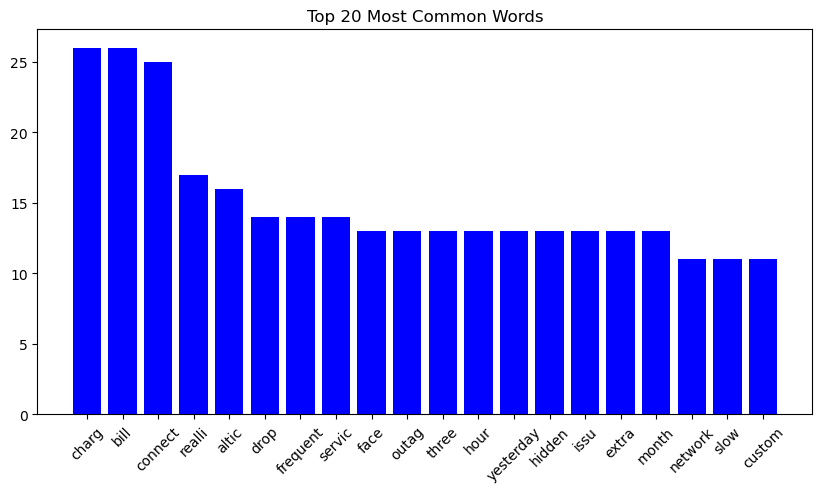

In [6]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Tokenizing the cleaned text
tokens = [word for row in df['cleaned_text'] for word in nltk.word_tokenize(row)]
word_freq = Counter(tokens)

# Plotting the top 20 most common words
common_words = word_freq.most_common(20)
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='blue')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


# 2 N-gram Analysis

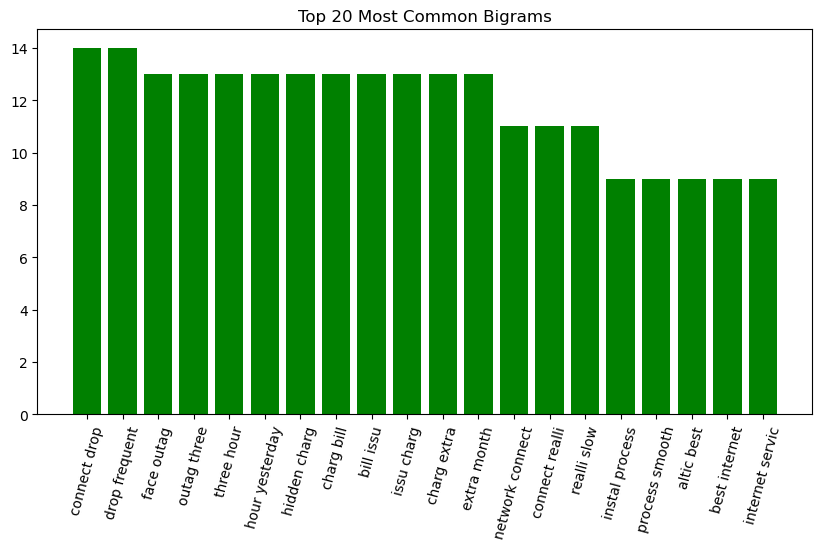

In [7]:
bigrams = nltk.bigrams(tokens)
bigram_freq = Counter(bigrams)

common_bigrams = bigram_freq.most_common(20)
bigrams = [' '.join(bigram[0]) for bigram in common_bigrams]
counts = [bigram[1] for bigram in common_bigrams]

plt.figure(figsize=(10,5))
plt.bar(bigrams, counts, color='green')
plt.title('Top 20 Most Common Bigrams')
plt.xticks(rotation=75)
plt.show()


# 3. Sparsity Visualizations

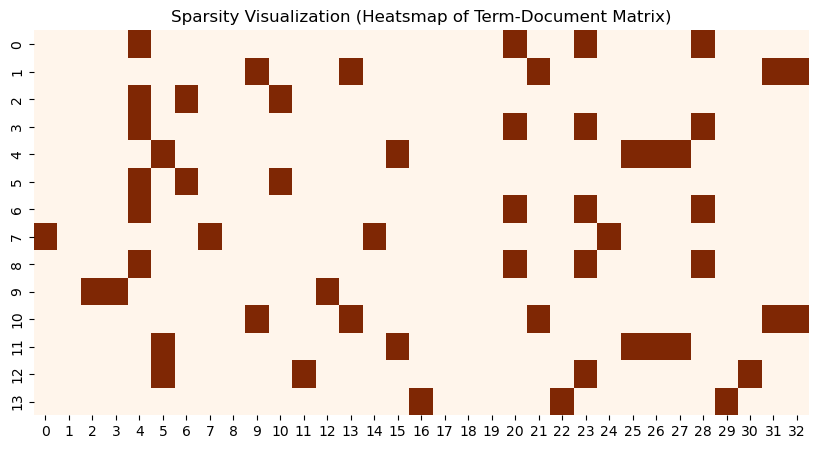

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Visualizing the sparsity
plt.figure(figsize=(10,5))
sns.heatmap(X.toarray()[:14], cmap='Oranges', cbar=False)
plt.title('Sparsity Visualization (Heatsmap of Term-Document Matrix)')
plt.show()


# 4 TF_IDF visualization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can set max_features to limit the number of columns in the matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])


# NNMF using --- Word Vectors from Count Vetcorizer and TF-IDF 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Convert the preprocessed documents in df['cleansed_text'] into a list
texts = df['cleaned_text'].tolist()
# Create a TF-IDF representation
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(texts)

# Apply NMF
n_topics = 5  # or however many topics you want
nmf_model = NMF(n_components=n_topics, random_state=1).fit(tfidf)

# Print the top words for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf_model.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)


Topic #0: charg hidden extra month issu yesterday id best connect custom
Topic #1: drop frequent connect slow network yesterday id best charg custom
Topic #2: yesterday face hour outag process instal smooth respons hidden best
Topic #3: realli slow network connect help support custom satisfi respons im
Topic #4: altic internet best servic recommend everyon id satisfi respons im


12

In [14]:
topic_assignments = nmf_model.transform(tfidf).argmax(axis=1)
df['Topic'] = topic_assignments


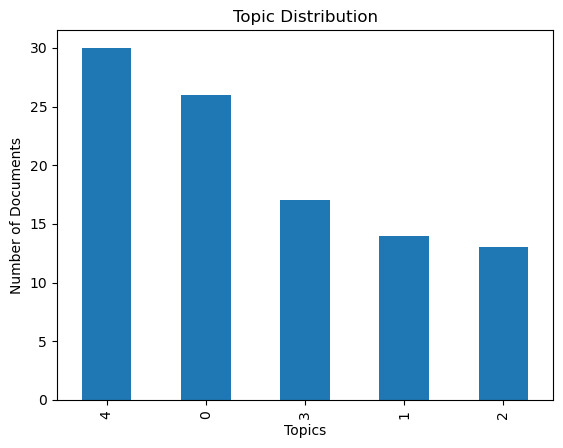

In [15]:
import matplotlib.pyplot as plt
df['Topic'].value_counts().plot(kind='bar')
plt.title('Topic Distribution')
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.show()


# Metrics

In [17]:
print("Reconstruction Error: ", nmf_model.reconstruction_err_)
# Reconstruction Error: One of the benefits of NMF is that 
# it provides a reconstruction error which 
# can give you a sense of how well the factorization went.

Reconstruction Error:  5.936169818030543
